In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import loaders
import warnings
from lightkurve import LightkurveWarning
warnings.filterwarnings("ignore", category=LightkurveWarning)
import math
%load_ext autoreload
%autoreload 2
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
def calc_mstat(flux):
    avg = np.nanmedian(flux)
    # print('avg ' + str(avg))
    stdev = np.nanstd(flux)
    # print('stdev ' + str(stdev))

    orderflux = np.sort(flux)
    num = len(orderflux)
    # Get top and bottom deciles of the lightcurve data:
    extremeup = orderflux[0:int(np.round(0.1*num))]
    #print(len(extremeup), extremeup)
    extremedown = orderflux[int(np.round(0.9*num)):num-1]
    #print(len(extremedown), extremedown)    
    extreme = np.append(extremeup,extremedown)
    #print(len(extreme), extreme)
    
    #print(avg, np.mean(extreme), stdev)
    diff = (avg-np.mean(extreme))/stdev
    return diff

def plot_mstat_depth(shape):
    mstats = np.array([])
    depths = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()   

    if shape == 'Triangle':
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49]) # triangles
    else:
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])


    #image_ratios = image_ratios + .02
    iteration = 0

    df_save = pd.DataFrame()

    #for vertices in range(3,4):
    #for ratio in range(1,11):
    for image_ratio in image_ratios:
    #for ratio in (1,1.2,1.4,1.6,1.8,2): #>=1
        if shape == 'Triangle':
            ratio = 1/ np.sqrt(1- 2*image_ratio) #triangle
        else:
            ratio = 1/ np.sqrt(1- image_ratio) #circ/square
        iteration +=1


        print("ratio " + str(image_ratio))
        df = pd.read_csv(#'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_0.6.csv'
                         '/home/jupyter/EightBitTransit/examples/Injected_LCs_tic251630511/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_0.6.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values

        df_save['Flux' + str(iteration)] = flux


        plt.ylim(0,1.1)

        plt.plot(time, flux, label='ratio' + str(ratio), color='grey')

        #plt.legend(loc='upper left')

        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        depth = np.min(flux[:-200])
        print('min ' +str(depth))
        depths = np.append(depths, depth)
        print("mstat: " + str(mstat) +"\n")
        #plt.show()

    #print(mstats)    

    #print('flux = flux[800:930] time = time[800:930]')
    #plt.plot(lc.time.value- lc.time.value[0], lc.flux.value, color = 'black')
    plt.title(str(shape) + 's', fontsize = 14)    
    plt.xlabel('Time [d]', fontsize = 14)
    plt.ylabel('Normalized Flux', fontsize = 14)
    plt.ylim(0,1.1)
    plt.show()
    plt.xlabel('Minimum Normalized Flux Stat', fontsize = 14)
    plt.ylabel('M', fontsize = 14)
    #plt.title(shape, fontsize = 14)
    plt.scatter(depths, mstats, color = 'black')
    plt.show()


    #list_of_tuples = list(zip(time, flux, depths, mstats))
    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Depths':depths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1) 

    print(df_save)
    #mstat_s = mstats
    #depths_s = depths

    os.makedirs('subplot_data_tic251630511',exist_ok=True)
    df_save.to_csv('./subplot_data_tic251630511/' + str(shape) + '_depth_spike.csv', index=False)

def find_width(shape, ratio):
    widths = np.array([])
    velocities = np.array([])
    #ratio = 1/ np.sqrt(1- ratio) #circle/square

    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #

        df = pd.read_csv('/home/jupyter/EightBitTransit/examples/Random_LCs_tic251630511/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values


        plt.plot(time, flux,label='velocity' +str(velocity), color = 'grey')


        nonzero_indices = df.index[flux != 1]
        first_nonzero_index = nonzero_indices[0]
        last_nonzero_index = nonzero_indices[-1]
        width = df.loc[last_nonzero_index, 'Time'] - df.loc[first_nonzero_index, 'Time']

        widths = np.append(widths, width)
        velocities = np.append(velocities, velocity)



    #plt.legend(loc='lower left')
    plt.title(str(shape) + 's')  
    plt.ylabel('Normalized Flux', fontsize = '14')
    plt.xlabel('Time [d]', fontsize = '14')
    plt.show()
    plt.xlabel('widths (days)', fontsize = '14')
    plt.ylabel('velocities', fontsize = '14')
    plt.scatter(widths, velocities, color = 'black')
    plt.show()
    widths = widths
    print(widths)
    print(velocities)
    return widths

def plot_mstat_width(shape, ratio, widths):
    velocities = np.array([])
    ratio = ratio
    mstats = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()    
    iteration = 0


    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    #for velocity in (.6,  1.0,  1.4,  1.8,  2.2,  2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #


        df = pd.read_csv('/home/jupyter/EightBitTransit/examples/Injected_LCs_tic251630511/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values
        iteration +=1


        plt.plot(time, flux,label='velocity' +str(velocity))#, color = 'grey')


        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        df_save['Flux' + str(iteration)] = flux


    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Widths':widths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1)     



    #plt.legend(loc='lower left')
    plt.title(str(shape) + 's')  
    plt.ylabel('Normalized Flux', fontsize = '14')
    plt.xlabel('Time [d]', fontsize = '14')
    plt.show()
    plt.xlabel('Widths [days]', fontsize = '14')
    plt.ylabel('M', fontsize = '14')
    plt.scatter(widths, mstats, color = 'black')
    plt.show()


    os.makedirs('subplot_data_tic251630511',exist_ok=True)
    df_save.to_csv('./subplot_data_tic251630511/' + str(shape) + '_width_spike.csv', index=False)


ratio 0.07
min 0.014784698840577204
mstat: 1.4768531043429205

ratio 0.16
min 0.0498872495324445
mstat: 1.4814253746178796

ratio 0.25
min 0.11218289057336794
mstat: 1.4844733360239473

ratio 0.34
min 0.18268455285175045
mstat: 1.4857698237158898

ratio 0.43
min 0.2740711418888629
mstat: 1.4837065446695212

ratio 0.52
min 0.3808730091985089
mstat: 1.479160481112517

ratio 0.61
min 0.5002717345785183
mstat: 1.4671951859569021

ratio 0.7
min 0.6089956984761621
mstat: 1.443755411917944

ratio 0.79
min 0.7282029000597509
mstat: 1.3866037851708766

ratio 0.88
min 0.8447445410110501
mstat: 1.2329615969633982

ratio 0.97
min 0.95788274248165
mstat: 0.5442876291894106

ratio 0.99
min 0.9747503988710194
mstat: 0.1302364444434861



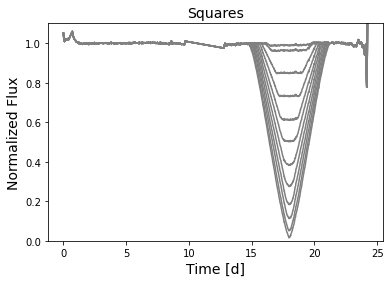

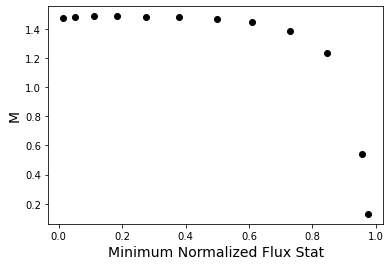

        Flux1     Flux2     Flux3     Flux4     Flux5     Flux6     Flux7  \
0    1.050501  1.050501  1.050501  1.050501  1.050501  1.050501  1.050501   
1    1.028940  1.028940  1.028940  1.028940  1.028940  1.028940  1.028940   
2    1.016522  1.016522  1.016522  1.016522  1.016522  1.016522  1.016522   
3    1.010777  1.010777  1.010777  1.010777  1.010777  1.010777  1.010777   
4    1.008389  1.008389  1.008389  1.008389  1.008389  1.008389  1.008389   
..        ...       ...       ...       ...       ...       ...       ...   
965  0.777674  0.777674  0.777674  0.777674  0.777674  0.777674  0.777674   
966  0.819710  0.819710  0.819710  0.819710  0.819710  0.819710  0.819710   
967  0.931162  0.931162  0.931162  0.931162  0.931162  0.931162  0.931162   
968  1.174399  1.174399  1.174399  1.174399  1.174399  1.174399  1.174399   
969  1.520235  1.520235  1.520235  1.520235  1.520235  1.520235  1.520235   

        Flux8     Flux9    Flux10    Flux11    Flux12       Time    Depths 

In [40]:
#Mstat for depths
shape = 'Square'
vertices = 11

plot_mstat_depth(shape)

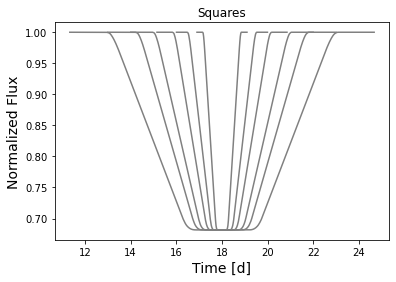

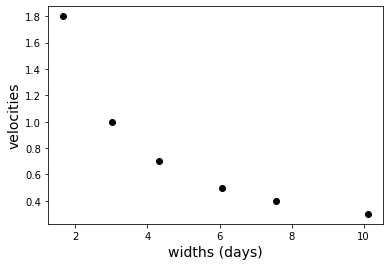

[10.11196911  7.56833977  6.06718147  4.31583012  3.02316602  1.66795367]
[0.3 0.4 0.5 0.7 1.  1.8]


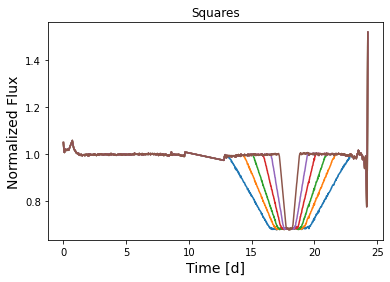

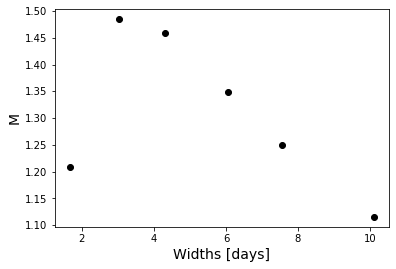

In [37]:
# Plot mstats for widths
shape = 'Square' 
ratio = 2 #triangles ratio 1.4, other ratio 2

widths = find_width(shape, ratio)
plot_mstat_width(shape, ratio, widths)

In [35]:
#ref = loaders.load_ref(18, "/mnt/disks/lcs/tess-goddard-lcs/")

data_dir = "/home/jupyter/mountpoint/"  # path for bucket

ref = loaders.load_ref(18, data_dir) #sector 18 camera 2

subref = ref[ref.TIC_ID.isin([251630511])]#377199128 # overplot with this anomalous
lcc = loaders.LightCurveCollection(subref)
lc = lcc.load_cut_lc(lcc[0])

In [30]:
from extern import features
features.feats(noise['Time'].values, noise['Flux'].values, noise['Flux_err'].values)
